In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
import keras
print("Keras Version:", keras.__version__)


TensorFlow Version: 2.17.0
Keras Version: 3.4.1


In [ ]:
dataset_path='/content/dataset_phishing.csv'

In [ ]:
dataset = pd.read_csv(dataset_path)
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
dataset.shape

(11430, 89)

In [ ]:
dataset.columns


Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:

# Define a mapping of values to be replaced
value_mapping = {'legitimate': 0, 'phishing': 1}

# Use the `replace` method to map values in the 'status' column
dataset['status'] = dataset['status'].replace(value_mapping)

# Save the modified DataFrame back to a CSV file if needed
# df.to_csv('modified_dataset.csv', index=False)  # Uncomment this line if you want to save the modified data

# Print the DataFrame to verify the changes
print(dataset)


                                                     url  length_url  ...  page_rank  status
0                  http://www.crestonwood.com/router.php          37  ...          4       0
1      http://shadetreetechnology.com/V4/validation/a...          77  ...          2       1
2      https://support-appleld.com.secureupdate.duila...         126  ...          0       1
3                                     http://rgipt.ac.in          18  ...          3       0
4      http://www.iracing.com/tracks/gateway-motorspo...          55  ...          6       0
...                                                  ...         ...  ...        ...     ...
11425      http://www.fontspace.com/category/blackletter          45  ...          6       0
11426  http://www.budgetbots.com/server.php/Server%20...          84  ...          0       1
11427  https://www.facebook.com/Interactive-Televisio...         105  ...         10       0
11428             http://www.mypublicdomainpictures.com/          38  

<ipython-input-7-45e9f5eb8f53>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['status'] = dataset['status'].replace(value_mapping)


In [ ]:
dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0000

In [ ]:
# Find columns with missing values
columns_with_missing_values = dataset.columns[dataset.isnull().any()]

# Print the columns with missing values
print(columns_with_missing_values)

Index([], dtype='object')


In [ ]:
# Calculate the variance of each column
column_variances = dataset.select_dtypes(include=np.number).var()

# Drop the index column
column_variances = column_variances.dropna()

# Find columns with low variance
columns_with_low_variance = column_variances[column_variances < 0.1].index

# Print the columns with low variance
print(columns_with_low_variance)

Index(['nb_at', 'nb_or', 'nb_tilde', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_dollar', 'nb_dslash', 'http_in_path', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'random_domain',
       'path_extension', 'nb_external_redirection', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_extRedirection',
       'ratio_intErrors', 'ratio_extErrors', 'login_form', 'submit_email',
       'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic',
       'whois_registered_domain', 'dns_record'],
      dtype='object')


In [ ]:
columns_to_remove=['length_hostname', 'nb_dots', 'nb_hyphens','domain_age',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain',
       'random_domain','path_extension','length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh',
       'popup_window', 'safe_anchor','empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'google_index', 'page_rank']

processedDataset=dataset.drop(columns=columns_to_remove)

In [ ]:
#processedDataset = dataset.copy()


In [ ]:
#checking the data for null or missing values
processedDataset.isnull().sum()

,0
url,0
length_url,0
ip,0
nb_at,0
https_token,0
nb_subdomains,0
prefix_suffix,0
shortening_service,0
nb_redirection,0
nb_external_redirection,0


In [ ]:
# Conditionally update the 'web_traffic' column based on the 'web_traffic' values
# Conditionally update the 'web_traffic' column
processedDataset['web_traffic'] = processedDataset['web_traffic'].apply(lambda x: 1 if x < 10000 else 0)


In [ ]:
processedDataset.shape

(11430, 16)

In [ ]:
processedDataset.head()


,url,length_url,ip,nb_at,https_token,nb_subdomains,prefix_suffix,shortening_service,nb_redirection,nb_external_redirection,iframe,onmouseover,right_clic,web_traffic,dns_record,status
0,http://www.crestonwood.com/router.php,37,0,0,1,3,0,0,0,0,0,0,0,1,1,0
1,http://shadetreetechnology.com/V4/validation/a...,77,1,0,1,1,0,0,1,0,0,0,0,1,0,1
2,https://support-appleld.com.secureupdate.duila...,126,1,0,0,3,1,0,1,0,0,0,0,0,0,1
3,http://rgipt.ac.in,18,0,0,1,2,0,0,1,0,0,0,0,0,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,0,0,1,2,0,0,1,0,0,0,0,1,0,0


In [ ]:
processedDataset.columns

Index(['url', 'length_url', 'ip', 'nb_at', 'https_token', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'nb_redirection',
       'nb_external_redirection', 'iframe', 'onmouseover', 'right_clic',
       'web_traffic', 'dns_record', 'status'],
      dtype='object')

In [ ]:
processedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   url                      11430 non-null  object
 1   length_url               11430 non-null  int64 
 2   ip                       11430 non-null  int64 
 3   nb_at                    11430 non-null  int64 
 4   https_token              11430 non-null  int64 
 5   nb_subdomains            11430 non-null  int64 
 6   prefix_suffix            11430 non-null  int64 
 7   shortening_service       11430 non-null  int64 
 8   nb_redirection           11430 non-null  int64 
 9   nb_external_redirection  11430 non-null  int64 
 10  iframe                   11430 non-null  int64 
 11  onmouseover              11430 non-null  int64 
 12  right_clic               11430 non-null  int64 
 13  web_traffic              11430 non-null  int64 
 14  dns_record               11430 non-nul

# **Visualizing the Data**

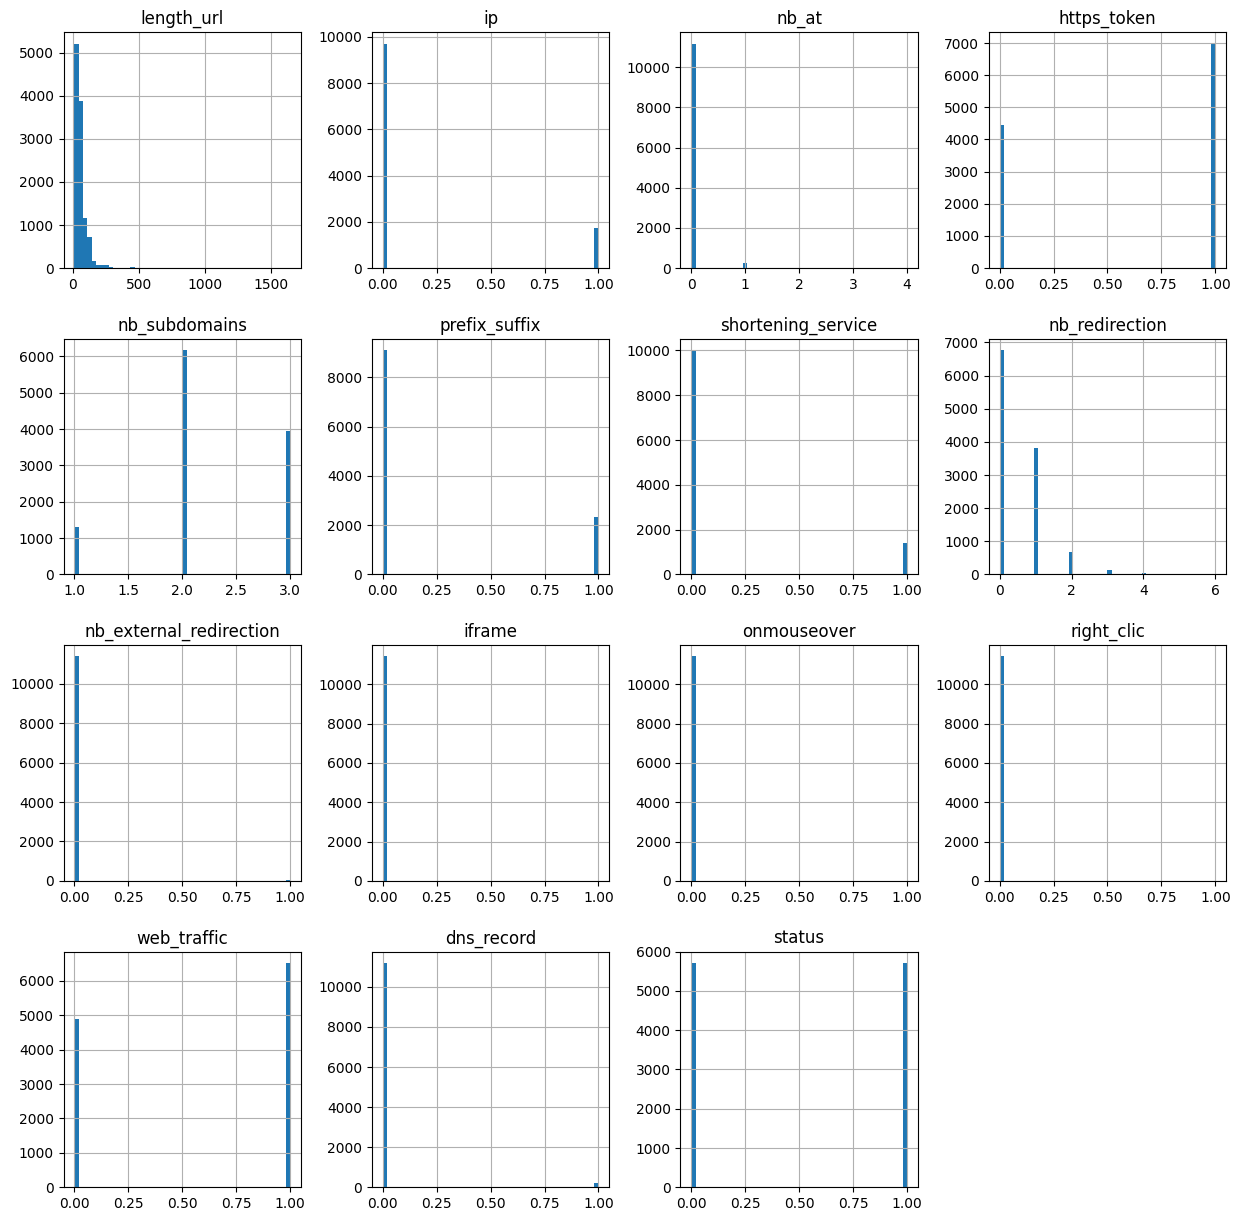

In [ ]:
#Plotting the data distribution
processedDataset.hist(bins = 50,figsize = (15,15))
plt.show()

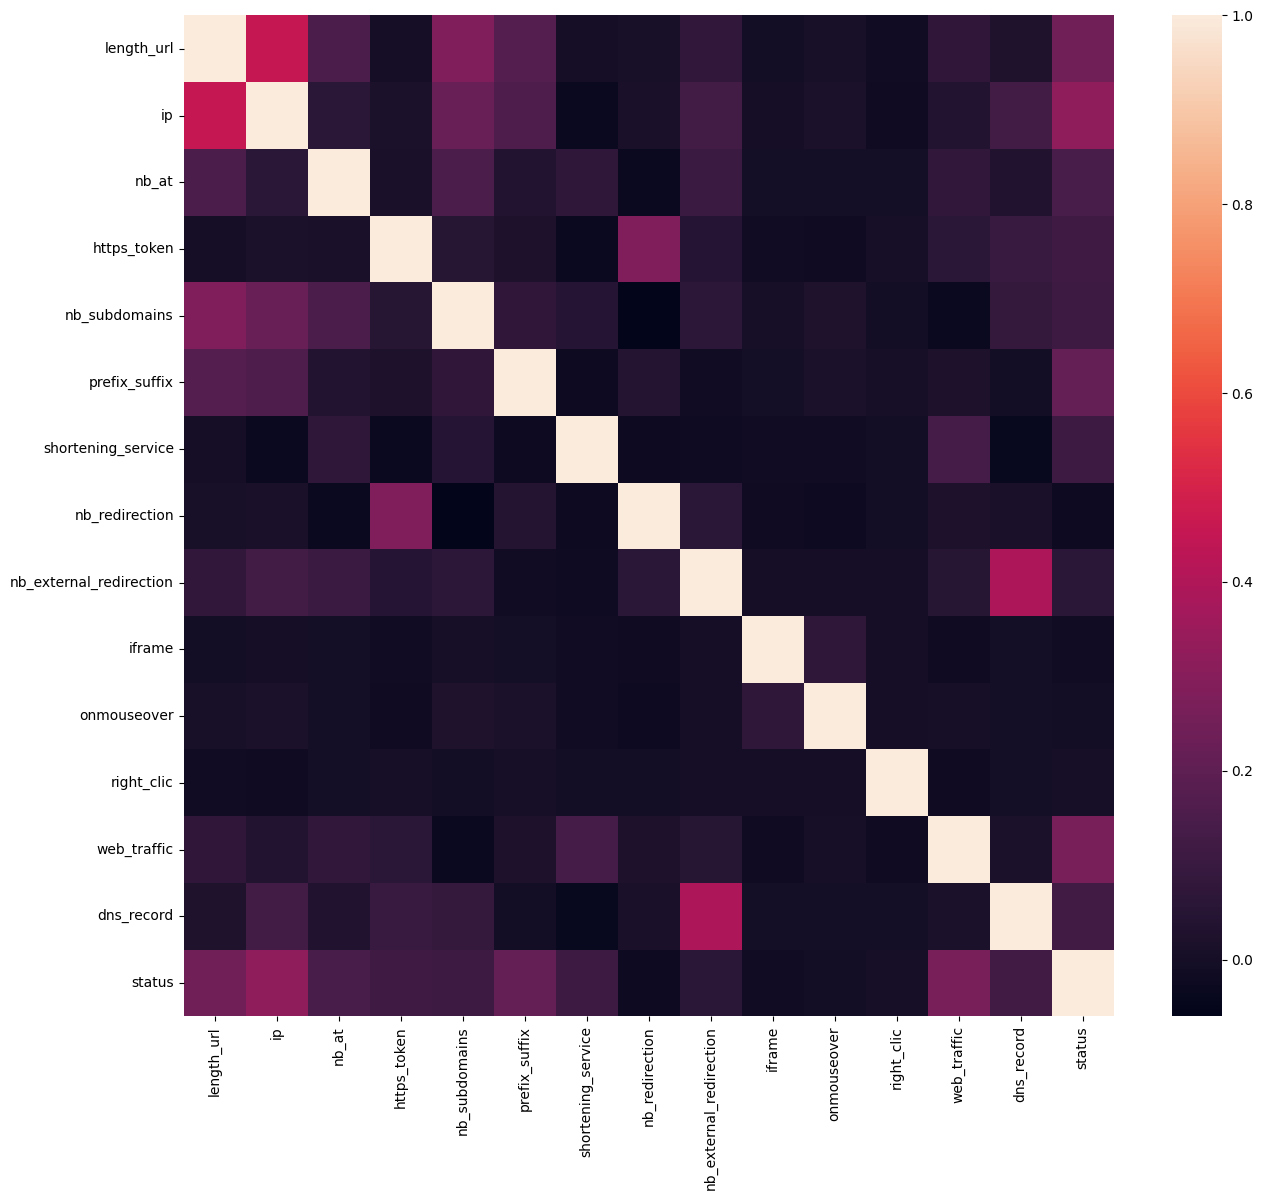

In [ ]:
#Correlation heatmap
numeric_df = processedDataset.select_dtypes(include=['number'])
plt.figure(figsize=(15,13))
sns.heatmap(numeric_df.corr())
plt.show()

In [ ]:
#Dropping the url column
processedDataset = processedDataset.drop(['url'], axis = 1).copy()

# **Shuffling and Splitting the Data**

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
processedDataset = processedDataset.sample(frac=1).reset_index(drop=True)
processedDataset.head()

,length_url,ip,nb_at,https_token,nb_subdomains,prefix_suffix,shortening_service,nb_redirection,nb_external_redirection,iframe,onmouseover,right_clic,web_traffic,dns_record,status
0,84,0,0,1,2,0,0,1,0,0,0,0,0,0,0
1,116,0,1,1,3,1,0,0,0,0,0,0,1,0,1
2,54,0,0,0,2,0,0,0,0,0,0,0,1,0,0
3,35,0,0,1,2,0,0,4,0,0,0,0,0,0,1
4,27,0,0,0,3,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = processedDataset['status']
X = processedDataset.drop('status',axis=1)
X.shape, y.shape


# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((9144, 14), (2286, 14))

# **Deep Learning Models & Training**

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# **Fully Convolutional Neural Network (CNN)**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5065 - loss: 1.2832 - val_accuracy: 0.5914 - val_loss: 0.6741
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5244 - loss: 0.7035 - val_accuracy: 0.5875 - val_loss: 0.6653
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5593 - loss: 0.6757 - val_accuracy: 0.5897 - val_loss: 0.6578
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5758 - loss: 0.6714 - val_accuracy: 0.5927 - val_loss: 0.6504
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5928 - loss: 0.6659 - val_accuracy: 0.5945 - val_loss: 0.6441
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6007 - loss: 0.6583 - val_accuracy: 0.6255 - val_loss: 0.6454
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5969 - loss: 0.6581 - val_accuracy: 0.6347 - val_loss: 0.6359
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6114 - loss: 0.6509 - val_accuracy: 0.6479

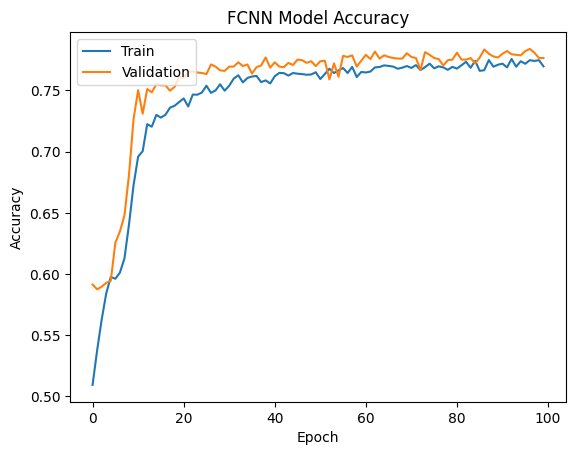

In [ ]:
# Assuming 'processedDataset' contains the pre-processed data without the 'url' column
# and 'status' is the target column (0 for legitimate, 1 for phishing)

# Separate features and target variable
y = processedDataset['status'].values
X = processedDataset.drop(['status'], axis=1).values  # Drop the 'status' column from features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the FCNN model
model_fcnn = Sequential()  # Changed model to model_fcnn to include the model name
model_fcnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 128 neurons
model_fcnn.add(Dropout(0.3))  # Dropout for regularization
model_fcnn.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model_fcnn.add(Dropout(0.3))  # Dropout for regularization
model_fcnn.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model_fcnn.add(Dropout(0.3))  # Dropout for regularization
model_fcnn.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_fcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history_fcnn = model_fcnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = (model_fcnn.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f'FCNN Test Accuracy: {test_accuracy:.4f}')

# View training and validation accuracy
train_accuracy = history_fcnn.history['accuracy'][-1]
val_accuracy = history_fcnn.history['val_accuracy'][-1]

# Store the results using the provided function
storeResults('Fully Connected Neural Network', train_accuracy, val_accuracy)

# Print the final training and validation accuracy
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history_fcnn.history['accuracy'])
plt.plot(history_fcnn.history['val_accuracy'])
plt.title('FCNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Multi Layer Perceptron**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4926 - loss: 2.4820 - val_accuracy: 0.5661 - val_loss: 0.6881
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5321 - loss: 0.7388 - val_accuracy: 0.5717 - val_loss: 0.6840
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5425 - loss: 0.6944 - val_accuracy: 0.5092 - val_loss: 0.6920
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5491 - loss: 0.6863 - val_accuracy: 0.6019 - val_loss: 0.6701
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5761 - loss: 0.6773 - val_accuracy: 0.5941 - val_loss: 0.6709
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5858 - loss: 0.6699 - val_accuracy: 0.5954 - val_loss: 0.6676
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5909 - loss: 0.6632 - val_accuracy: 0.6164 - val_loss: 0.6510
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6082 - loss: 0.6578 - val_ac

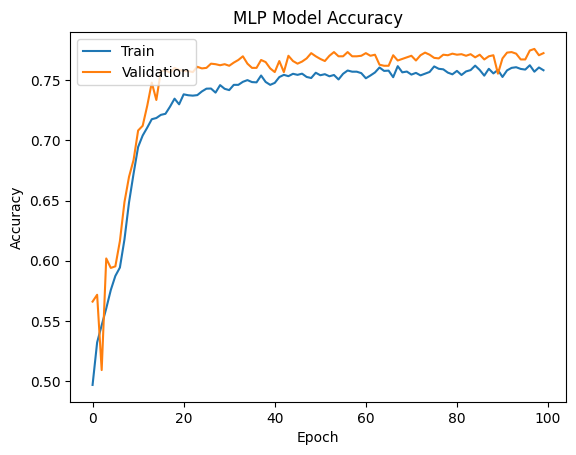

In [ ]:


# Assuming 'processedDataset' contains the pre-processed data without the 'url' column
# and 'status' is the target column (0 for legitimate, 1 for phishing)

# Separate features and target variable
y = processedDataset['status'].values
X = processedDataset.drop(['status'], axis=1).values  # Drop the 'status' column from features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the MLP model
model_mlp = Sequential()
model_mlp.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 128 neurons
model_mlp.add(Dropout(0.5))  # Dropout for regularization
model_mlp.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model_mlp.add(Dropout(0.5))  # Dropout for regularization
model_mlp.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model_mlp.add(Dropout(0.5))  # Dropout for regularization
model_mlp.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_mlp.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history_mlp = model_mlp.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = (model_mlp.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Test Accuracy: {test_accuracy:.4f}')

# View training and validation accuracy
train_accuracy = history_mlp.history['accuracy'][-1]
val_accuracy = history_mlp.history['val_accuracy'][-1]

# Store the results using the provided function
storeResults('Multilayer Perceptron', train_accuracy, val_accuracy)
# Print the final training and validation accuracy
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

# Print the final training and validation accuracy
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

Final Training Accuracy: 0.7583
Final Validation Accuracy: 0.7725


## **LSTM Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5230 - loss: 1.2400 - val_accuracy: 0.6199 - val_loss: 0.6452
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5996 - loss: 0.6532 - val_accuracy: 0.6037 - val_loss: 0.6234
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6252 - loss: 0.6306 - val_accuracy: 0.6671 - val_loss: 0.6115
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6481 - loss: 0.6166 - val_accuracy: 0.7038 - val_loss: 0.5913
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6634 - loss: 0.6109 - val_accuracy: 0.7047 - val_loss: 0.5656
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6837 - loss: 0.5971 - val_accuracy: 0.7012 - val_loss: 0.5577
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7014 - loss: 0.5791 - val_accuracy: 0.7410 - val_loss: 0.5565
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7026 - loss: 0.5719 - val_acc

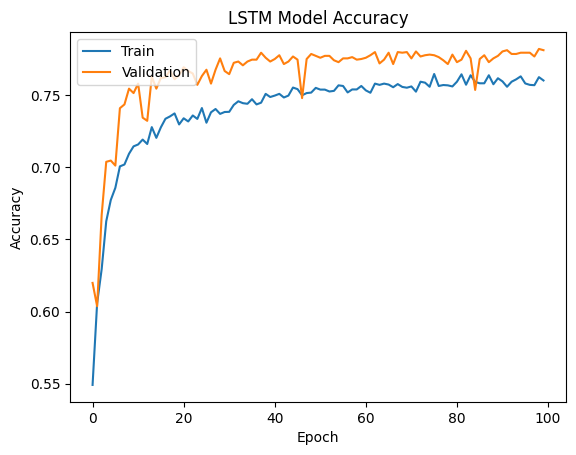

In [ ]:
# Assuming 'processedDataset' contains the pre-processed data without the 'url' column
# and 'status' is the target column (0 for legitimate, 1 for phishing)

# Separate features and target variable
y = processedDataset['status'].values
X = processedDataset.drop(['status'], axis=1).values  # Drop the 'status' column from features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping the data for LSTM [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model_lstm = Sequential()  # Changed model to model_lstm to include the model name
model_lstm.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(Flatten())  # Flatten the output from LSTM to feed into dense layers
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_lstm.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
y_pred = (model_lstm.predict(X_test_reshaped) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f'LSTM Test Accuracy: {test_accuracy:.4f}')

# View training and validation accuracy
train_accuracy = history_lstm.history['accuracy'][-1]
val_accuracy = history_lstm.history['val_accuracy'][-1]

# Store the results using the provided function
storeResults('LSTM', train_accuracy, val_accuracy)

# Print the final training and validation accuracy
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Gated Recurrent Unit (GRU)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5374 - loss: 1.1420 - val_accuracy: 0.5976 - val_loss: 0.6445
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5873 - loss: 0.6669 - val_accuracy: 0.6177 - val_loss: 0.6350
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6082 - loss: 0.6383 - val_accuracy: 0.6514 - val_loss: 0.6097
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6324 - loss: 0.6301 - val_accuracy: 0.6750 - val_loss: 0.5922
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6680 - loss: 0.6026 - val_accuracy: 0.7091 - val_loss: 0.5722
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6832 - loss: 0.5896 - val_accuracy: 0.6929 - val_loss: 0.5692
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6853 - loss: 0.5877 - val_accuracy: 0.7262 - val_loss: 0.5499
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7002 - loss: 0.5797 - val_accu

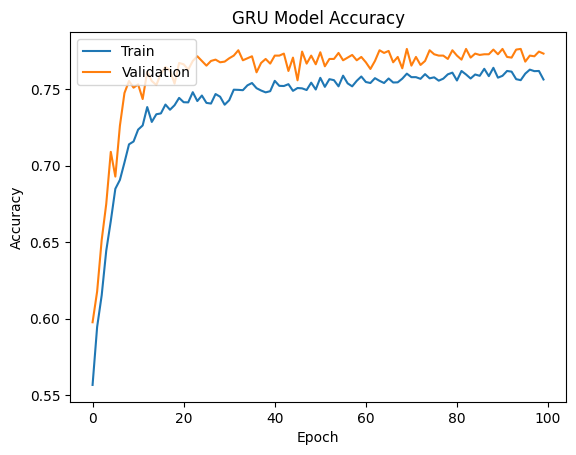

In [ ]:
# Assuming 'processedDataset' contains the pre-processed data without the 'url' column
# and 'status' is the target column (0 for legitimate, 1 for phishing)

# Separate features and target variable
y = processedDataset['status'].values
X = processedDataset.drop(['status'], axis=1).values  # Drop the 'status' column from features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping the data for GRU [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the GRU model
model_gru = Sequential()  # Changed model to model_gru to include the model name
model_gru.add(GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
model_gru.add(Dropout(0.5))
model_gru.add(Flatten())  # Flatten the output from GRU to feed into dense layers
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history_gru = model_gru.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test set
y_pred = (model_gru.predict(X_test_reshaped) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f'GRU Test Accuracy: {test_accuracy:.4f}')

# View training and validation accuracy
train_accuracy = history_gru.history['accuracy'][-1]
val_accuracy = history_gru.history['val_accuracy'][-1]

# Store the results using the provided function
storeResults('GRU', train_accuracy, val_accuracy)

# Print the final training and validation accuracy
print(f'Final Training Accuracy: {train_accuracy:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Comparison Between models accuracy**

In [ ]:


# Assuming ML_Model, acc_train, and acc_test are lists of the same length
unique_models = list(set(ML_Model))

# Create a list of unique model names and their corresponding train and test accuracy values
model_results = []
for model_name in unique_models:
    model_indices = [i for i, name in enumerate(ML_Model) if name == model_name]
    max_train_accuracy = max(acc_train[i] for i in model_indices)
    max_test_accuracy = max(acc_test[i] for i in model_indices)
    model_results.append((model_name, max_train_accuracy, max_test_accuracy))

# Create the results DataFrame
results = pd.DataFrame(model_results, columns=['ML Model', 'Train Accuracy', 'Test Accuracy'])

# Print the results DataFrame
results


,ML Model,Train Accuracy,Test Accuracy
0,LSTM,0.760,0.781
1,Fully Connected Neural Network,0.770,0.776
2,GRU,0.756,0.773
3,Multilayer Perceptron,0.762,0.773


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,LSTM,0.760,0.781
1,Fully Connected Neural Network,0.770,0.776
3,Multilayer Perceptron,0.762,0.773
2,GRU,0.756,0.773


In [ ]:
# Assuming each model variable (model_fcnn, model_lstm, etc.) is a Keras model instance

# Trained models
models_dl = {
    'Fully Connected Neural Network': model_fcnn,  # Your trained FCNN model
    'LSTM': model_lstm,                           # Your trained LSTM model
    'GRU': model_gru,                             # Your trained GRU model
    'Multilayer Perceptron': model_mlp            # Your trained MLP model
}

# Save each model as an .h5 file using Keras' save method
for model_name, model in models_dl.items():
    filename = f'models/{model_name}_model.h5'  # Adjust path if needed
    model.save(filename)  # Save the model
    print(f'Saved {model_name} model as {filename}')


Saved Fully Connected Neural Network model as models/Fully Connected Neural Network_model.h5
Saved LSTM model as models/LSTM_model.h5
Saved GRU model as models/GRU_model.h5
Saved Multilayer Perceptron model as models/Multilayer Perceptron_model.h5
